# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [6]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

['Latacunga', 'Ambato']


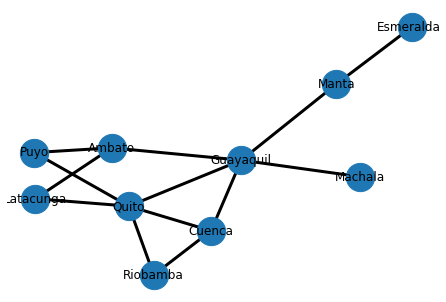

Nodos:  10 ['Riobamba', 'Quito', 'Guayaquil', 'Cuenca', 'Latacunga', 'Puyo', 'Machala', 'Ambato', 'Manta', 'Esmeraldas']
Enlaces:  13 [('Riobamba', 'Cuenca'), ('Riobamba', 'Quito'), ('Quito', 'Cuenca'), ('Quito', 'Guayaquil'), ('Quito', 'Latacunga'), ('Quito', 'Puyo'), ('Guayaquil', 'Cuenca'), ('Guayaquil', 'Machala'), ('Guayaquil', 'Ambato'), ('Guayaquil', 'Manta'), ('Latacunga', 'Ambato'), ('Puyo', 'Ambato'), ('Manta', 'Esmeraldas')]


In [43]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)


if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Latacunga'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
        
        
     

    import networkx as g

#Se importa la libreria pyplot de matplotlib como plt

import matplotlib.pyplot as plt

Gra=g.Graph()

#Se crean los nodos:

#Gra.add_node("cuenca")

Gra.add_nodes_from(["Riobamba","Quito","Guayaquil"])

Gra.add_edge("Riobamba","Cuenca")

Gra.add_edge("Quito","Cuenca")


Gra.add_edge("Guayaquil","Cuenca")


Gra.add_edge("Quito","Riobamba")


Gra.add_edge("Cuenca","Riobamba")


Gra.add_edge("Riobamba","Quito")


Gra.add_edge("Guayaquil","Quito")


Gra.add_edge("Latacunga","Quito")


Gra.add_edge("Puyo","Quito")


Gra.add_edge("Machala","Guayaquil")


Gra.add_edge("Ambato","Guayaquil")


Gra.add_edge("Quito","Guayaquil")


Gra.add_edge("Cuenca","Guayaquil")


Gra.add_edge("Manta","Guayaquil")

Gra.add_edge("Latacunga","Quito")

Gra.add_edge("Ambato","Latacunga")

Gra.add_edge("Quito","Latacunga")

Gra.add_edge("Manta","Esmeraldas")

Gra.add_edge("Guayaquil","Manta")

Gra.add_edge("Puyo","Ambato")

Gra.add_edge("Guayaquil","Ambato")

Gra.add_edge("Latacunga","Ambato")

Gra.add_edge("Ambato","Puyo")

Gra.add_edge("Quito","Puyo")

Gra.add_edge("Guayaquil","Machala")

#Se dibuja el grafo

#nx.draw(G)
nx.draw(Gra, with_labels=True,node_size=800,width=3)

#Se muestra en pantalla

plt.show()

#Se muestra información de los nodos (cantidad, nodos)

print ("Nodos: ", Gra.number_of_nodes(), Gra.nodes())

#SE muestra información de los enlaces (cantidad, enlaces)

print ("Enlaces: ", Gra.number_of_edges(),Gra.edges())

# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

In [20]:
# Agregar la solucion en markdown (Informe)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion




# Implementar

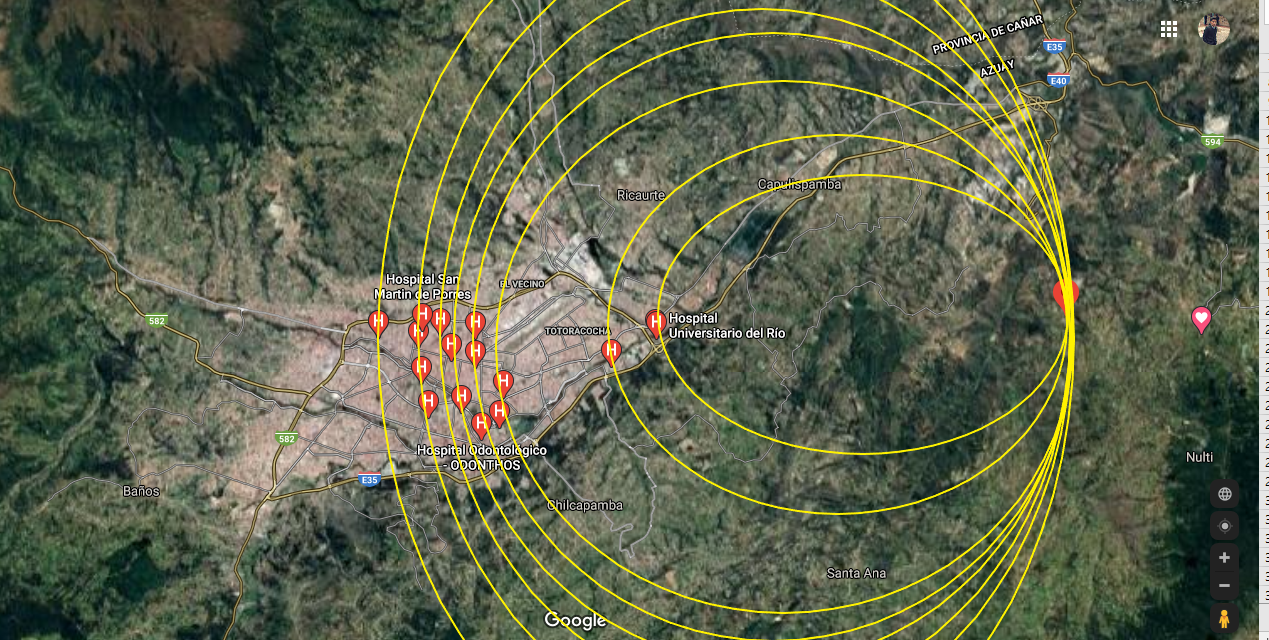
    

In [ ]:

class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)


if __name__ == "__main__":
    connections = {
        'Jadan': {'h del rio'},
        'h del rio': {'h Regional'},
        'h Regional': {'h catolico', 'h vicente c. moscoso'},
        'h vicente c. moscoso': {'h juan de dios', 'h monte sinai'},
        'h catolico': {'clinica praxel'},
        'clinica praxel': {'h Bolivar', 'h san martin'},
        'h monte sinai': {'clinica santa ines' , 'clinica latino'}     
    }

    init_state = 'h catolico'
    solution = 'clinica latino'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
        
        
     

    import networkx as g

#Se importa la libreria pyplot de matplotlib como plt

import matplotlib.pyplot as plt

Gra=g.Graph()

#Se crean los nodos:

#Gra.add_node("cuenca")

Gra.add_nodes_from(["Jadan"])

Gra.add_edge("h del rio","Jadan")

Gra.add_edge("h Regional","h catolico")

Gra.add_edge("h vicente c. moscoso","h juan de dios", "h momte sinai")

Gra.add_edge("h san juande dios","clinica praxel")

Gra.add_edge("h monte Sinai","clinica santa ines")

Gra.add_edge("Clinica Praxel ","h Bolivar", "h san martin")

Gra.add_edge("Clinica Latino","h san Bolivar")

#Se dibuja el grafo

#nx.draw(G)
nx.draw(Gra, with_labels=True,node_size=800,width=3)

#Se muestra en pantalla

plt.show()

#Se muestra información de los nodos (cantidad, nodos)

print ("Nodos: ", Gra.number_of_nodes(), Gra.nodes())

#SE muestra información de los enlaces (cantidad, enlaces)

print ("Enlaces: ", Gra.number_of_edges(),Gra.edges())

In [ ]:
# Conclusiones

Los recorridos de un árbol se entienden por el tratamiento realizado para acceder a los diferentes nodos de un árbol. El recorrido puede afectar a la totalidad de los nodos del árbol, por eso debemos tener muy claro que al realizar un árbol debemos colocar nombres complejos que trate del algoritmo que estamos realizando, ya que al realizar los recorridos debemos saber dónde estamos ubicados en dicho árbol.